# Capstone Group 5 Data Preprocessing
Prepared by: `Kuhgi Jotojot`

## 1. Library Prerequisites

In [ ]:
# pip install numpy pandas
# pip install scikit-learn

In [37]:
import pandas as pd
import numpy as np
import os
import re
import math
import calendar

# Plotting
import matplotlib.pyplot as plt

# Dimensionality Reduction
from sklearn.decomposition import TruncatedSVD

# Scaling of Data
from sklearn.preprocessing import StandardScaler

## 2. Loading Data

In [9]:
path = "raw_data/"
closing_price_list_with_time = list()

for filename in os.listdir(path):
    file_path = os.path.join(path, filename)

    pattern = r"PSE_DLY_([A-Z]+),\s*"  # Updated regex to handle the comma and optional whitespace

    match = re.search(pattern, filename)
    if match:
        ticker = match.group(1)
    else:
        print(f"No ticker in file: {filename}")
        continue  # Skip this file

    # Read CSV and set 'time' as index
    prices = pd.read_csv(file_path, parse_dates=['time'])
    prices.set_index('time', inplace=True)

    # Keep only the 'close' column, rename it to the ticker
    prices = prices[['close']]
    prices = prices.rename(columns={'close': ticker})

    # Append to list
    closing_price_list_with_time.append(prices)

# Combine all into one DataFrame
closing_prices_with_time_df = pd.concat(closing_price_list_with_time, axis=1)

# Optional: Sort by date (index)
closing_prices_with_time_df = closing_prices_with_time_df[
    (closing_prices_with_time_df.index >= '2021-06-01') & 
    (closing_prices_with_time_df.index <= '2024-12-31')
]
closing_prices_with_time_df.sort_index(inplace=True)

In [10]:
display(closing_prices_with_time_df)

,AC,ACEN,AEV,AGI,ALI,AREIT,BDO,BLOOM,BPI,CBC,...,MBT,MER,MONDE,PGOLD,SCC,SM,SMC,SMPH,TEL,URC
time,,,,,,,,,,,,,,,,,,,,,
2021-06-01,745.742852,7.126867,34.093254,9.865820,33.181935,28.876939,80.683465,6.438434,70.250094,20.011775,...,38.355134,227.273458,12.548869,32.004682,6.892854,922.658299,109.872241,35.070055,983.825397,119.078218
2021-06-02,774.903310,7.234112,34.749735,10.229097,35.030643,29.155749,81.217287,6.887173,71.416757,20.011775,...,38.394675,231.331912,12.548869,32.914151,7.047634,960.602081,113.563039,36.459444,990.631261,123.424138
2021-06-03,762.952303,7.351105,33.918192,10.171737,34.604018,28.876939,80.225903,6.955459,71.666760,19.642706,...,38.750548,230.520221,12.195118,32.610996,7.243688,958.680877,114.036219,35.836618,996.680917,122.381117
2021-06-04,770.600947,7.585093,33.830663,10.133498,34.509214,29.036261,81.598589,6.974970,71.541758,19.683713,...,38.829629,228.896840,12.474395,32.697610,7.130183,960.602081,112.143501,35.453337,1004.242988,121.685770
2021-06-07,760.084061,7.585093,34.312081,9.789341,34.414406,29.155749,81.141027,6.877418,70.958428,19.847745,...,38.631922,223.215003,12.530251,33.087384,7.223051,950.996060,111.197143,35.117969,1000.461953,122.554954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-19,589.929882,3.600000,31.160000,8.639540,24.567847,36.850836,145.718833,4.448372,122.000000,60.412500,...,69.811896,451.887359,6.930843,29.209985,31.035083,863.865206,86.675470,24.398868,1227.272730,73.644428
2024-12-20,589.433308,3.780000,31.445872,8.600000,24.469181,36.604506,142.371238,4.409351,121.500000,60.266576,...,69.621414,439.632127,7.596517,29.983759,31.271271,869.775344,86.675470,24.300880,1209.878313,72.674146
2024-12-23,595.888770,4.000000,32.112905,8.600000,25.899838,37.047899,142.863531,4.380086,122.600000,61.677174,...,71.240516,472.701801,8.007668,29.983759,31.176796,886.520736,86.923398,24.643836,1212.777382,72.771174


## 3. Data Preprocessing

### 3.1 Returns and Volatility

#### Notes

* Returns - mean percentage return throughout the duration of stock publicity
* Volatility - standard deviation of closing prices over the duration of stock's publicity

In [11]:
# Create an empty dataframe
returns = pd.DataFrame()

# Define the column Returns
returns['Returns'] = closing_prices_with_time_df.pct_change().mean() * 252

# Define the column Volatility
returns['Volatility'] = closing_prices_with_time_df.pct_change().std() * math.sqrt(252)

C:\Users\Kuji\AppData\Local\Temp\ipykernel_19928\1504033015.py:5: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns['Returns'] = closing_prices_with_time_df.pct_change().mean() * 252
C:\Users\Kuji\AppData\Local\Temp\ipykernel_19928\1504033015.py:8: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns['Volatility'] = closing_prices_with_time_df.pct_change().std() * math.sqrt(252)


In [12]:
display(returns)

,Returns,Volatility
AC,-0.016715,0.304282
ACEN,-0.087725,0.395486
AEV,0.051135,0.354283
AGI,0.019598,0.303760
ALI,-0.008708,0.354750
AREIT,0.108493,0.261918
BDO,0.205465,0.296595
BLOOM,-0.026898,0.394885
BPI,0.197432,0.280190
CBC,0.340479,0.186384


### 3.2 P/E Ratio

In [13]:
data_dir = "raw_data"

pe_ratios = {}

for stock in returns.index:
    matching_files = [f for f in os.listdir(data_dir) if stock in f and f.endswith('.csv')]

    if matching_files:
        file_path = os.path.join(data_dir, matching_files[0])
        
        # Read and get the latest P/E ratio
        df_pe = pd.read_csv(file_path, parse_dates=['time'])
        latest_pe = df_pe.sort_values('time').iloc[-1]['P/E ratio']
        
        pe_ratios[stock] = latest_pe
    else:
        pe_ratios[np.nan] = None  # or you can use np.nan


returns['P/E ratio'] = returns.index.map(pe_ratios)

In [14]:
display(returns)

,Returns,Volatility,P/E ratio
AC,-0.016715,0.304282,8.985726
ACEN,-0.087725,0.395486,14.889815
AEV,0.051135,0.354283,12.114948
AGI,0.019598,0.303760,2.881266
ALI,-0.008708,0.354750,11.838829
AREIT,0.108493,0.261918,15.318954
BDO,0.205465,0.296595,10.499345
BLOOM,-0.026898,0.394885,12.995808
BPI,0.197432,0.280190,11.620175
CBC,0.340479,0.186384,7.680736


### 3.3 Seasonal Indices

In [15]:
# Ensure the index is datetime
closing_prices_with_time_df.index = pd.to_datetime(closing_prices_with_time_df.index)

# Create temp dataframe then
temp_df = pd.DataFrame()

# Calculate grand mean for each stock
temp_df['Grand_Mean'] = closing_prices_with_time_df.mean()

for i in range(1,13):
    month_name = calendar.month_name[i]  # Converts 12 -> "December"

    # Calculate monthly average for the specified month
    monthly_avg = closing_prices_with_time_df[closing_prices_with_time_df.index.month == i].mean()

    # Create the seasonality column
    temp_df[f'Seasonality_Index_{month_name}'] = monthly_avg / temp_df['Grand_Mean']


In [16]:
display(temp_df)

,Grand_Mean,Seasonality_Index_January,Seasonality_Index_February,Seasonality_Index_March,Seasonality_Index_April,Seasonality_Index_May,Seasonality_Index_June,Seasonality_Index_July,Seasonality_Index_August,Seasonality_Index_September,Seasonality_Index_October,Seasonality_Index_November,Seasonality_Index_December
AC,676.870497,1.085499,1.075501,1.016639,0.971656,0.942473,0.966019,0.928333,0.964596,1.002802,1.013113,1.025997,1.038351
ACEN,6.577332,1.039728,0.992101,0.933867,0.892726,0.881619,0.978200,1.000693,1.056918,1.031038,1.052827,1.054758,1.015996
AEV,44.380576,1.129890,1.105525,1.096346,1.037275,0.990998,0.950826,0.939544,0.936650,0.965679,0.972533,0.973864,0.998352
AGI,10.494684,1.109409,1.135397,1.103001,1.058245,1.053464,0.979276,0.955366,0.954901,0.959451,0.924096,0.921112,0.966864
ALI,29.778680,1.077410,1.094022,1.044585,0.981637,0.910649,0.957837,0.939073,0.981452,1.008330,1.014234,1.008736,1.015532
AREIT,32.736982,1.050016,1.056174,1.042062,0.994552,0.958150,0.944951,0.959055,0.982419,0.982092,0.987820,1.022260,1.054752
BDO,116.766228,0.979305,1.053018,1.029921,1.060811,1.040318,0.934440,0.962937,0.970385,0.993060,1.023168,1.009887,0.990335
BLOOM,8.032190,1.041532,1.120378,1.089848,1.056362,1.127828,0.993561,0.991900,0.961446,0.977140,0.940262,0.930410,0.873347
BPI,95.633287,0.965547,1.012886,0.996696,1.036725,1.047646,0.941633,0.984412,0.977885,0.986978,1.031243,1.025430,1.013541
CBC,28.975869,0.854247,0.912591,0.928765,0.983167,1.043833,0.929564,0.959681,0.961019,1.004698,1.123562,1.112596,1.126258


In [17]:
temp_df = temp_df.drop(columns=['Grand_Mean'])

In [18]:
seasonality_df = temp_df.copy()
seasonality_df = seasonality_df.transpose()

In [19]:
seasonality_df.to_csv('data/seasonality_data.csv')

In [20]:
# plt.figure(figsize=(10, 6))
# plt.plot(temp_df.index, temp_df['SMC'], marker='o', linestyle='-', color='blue')
# plt.title('Seasonality Index per Month')
# plt.xlabel('Month')
# plt.ylabel('Seasonality Index')
# plt.xticks(rotation=45)
# plt.grid(True)
# plt.tight_layout()
# plt.show()

In [21]:
# Create a list of month names in order
month_names = [calendar.month_name[m] for m in range(1, 13)]

# Loop through months from February to December to calculate MoM seasonality
for i in range(1, len(month_names)):
    curr_month = month_names[i]
    prev_month = month_names[i - 1]
    
    curr_col = f'Seasonality_Index_{curr_month}'
    prev_col = f'Seasonality_Index_{prev_month}'
    
    new_col = f'Seasonality_MoM_{curr_month}'
    returns[new_col] = temp_df[curr_col] - temp_df[prev_col]

In [22]:
display(returns)

,Returns,Volatility,P/E ratio,Seasonality_MoM_February,Seasonality_MoM_March,Seasonality_MoM_April,Seasonality_MoM_May,Seasonality_MoM_June,Seasonality_MoM_July,Seasonality_MoM_August,Seasonality_MoM_September,Seasonality_MoM_October,Seasonality_MoM_November,Seasonality_MoM_December
AC,-0.016715,0.304282,8.985726,-0.009999,-0.058862,-0.044983,-0.029183,0.023546,-0.037687,0.036263,0.038206,0.010311,0.012884,0.012354
ACEN,-0.087725,0.395486,14.889815,-0.047627,-0.058235,-0.041141,-0.011107,0.096581,0.022493,0.056225,-0.025880,0.021788,0.001931,-0.038762
AEV,0.051135,0.354283,12.114948,-0.024365,-0.009179,-0.059071,-0.046277,-0.040172,-0.011282,-0.002894,0.029029,0.006855,0.001330,0.024488
AGI,0.019598,0.303760,2.881266,0.025988,-0.032396,-0.044755,-0.004781,-0.074188,-0.023911,-0.000464,0.004550,-0.035355,-0.002984,0.045752
ALI,-0.008708,0.354750,11.838829,0.016611,-0.049436,-0.062949,-0.070988,0.047188,-0.018764,0.042379,0.026878,0.005904,-0.005498,0.006796
AREIT,0.108493,0.261918,15.318954,0.006158,-0.014113,-0.047510,-0.036402,-0.013199,0.014104,0.023364,-0.000327,0.005728,0.034440,0.032492
BDO,0.205465,0.296595,10.499345,0.073713,-0.023097,0.030890,-0.020492,-0.105878,0.028497,0.007448,0.022675,0.030108,-0.013281,-0.019552
BLOOM,-0.026898,0.394885,12.995808,0.078846,-0.030530,-0.033487,0.071466,-0.134267,-0.001661,-0.030454,0.015694,-0.036878,-0.009852,-0.057063
BPI,0.197432,0.280190,11.620175,0.047339,-0.016190,0.040029,0.010921,-0.106013,0.042779,-0.006528,0.009094,0.044265,-0.005813,-0.011889
CBC,0.340479,0.186384,7.680736,0.058344,0.016174,0.054402,0.060666,-0.114269,0.030117,0.001338,0.043679,0.118864,-0.010966,0.013663


### 3.4 Moving Average Window

In [24]:
closing_prices_with_time_df.head()

,AC,ACEN,AEV,AGI,ALI,AREIT,BDO,BLOOM,BPI,CBC,...,MBT,MER,MONDE,PGOLD,SCC,SM,SMC,SMPH,TEL,URC
time,,,,,,,,,,,,,,,,,,,,,
2021-06-01,745.742852,7.126867,34.093254,9.865820,33.181935,28.876939,80.683465,6.438434,70.250094,20.011775,...,38.355134,227.273458,12.548869,32.004682,6.892854,922.658299,109.872241,35.070055,983.825397,119.078218
2021-06-02,774.903310,7.234112,34.749735,10.229097,35.030643,29.155749,81.217287,6.887173,71.416757,20.011775,...,38.394675,231.331912,12.548869,32.914151,7.047634,960.602081,113.563039,36.459444,990.631261,123.424138
2021-06-03,762.952303,7.351105,33.918192,10.171737,34.604018,28.876939,80.225903,6.955459,71.666760,19.642706,...,38.750548,230.520221,12.195118,32.610996,7.243688,958.680877,114.036219,35.836618,996.680917,122.381117
2021-06-04,770.600947,7.585093,33.830663,10.133498,34.509214,29.036261,81.598589,6.974970,71.541758,19.683713,...,38.829629,228.896840,12.474395,32.697610,7.130183,960.602081,112.143501,35.453337,1004.242988,121.685770
2021-06-07,760.084061,7.585093,34.312081,9.789341,34.414406,29.155749,81.141027,6.877418,70.958428,19.847745,...,38.631922,223.215003,12.530251,33.087384,7.223051,950.996060,111.197143,35.117969,1000.461953,122.554954


In [25]:
# Assuming your DataFrame is called `closing_prices_with_time_df`
for_ma_df = closing_prices_with_time_df.copy()

# Calculate the 20-day moving average for each stock
ma_df = for_ma_df.rolling(window=20, min_periods=1).mean()

# Optionally, rename columns to reflect that these are MAs
ma_df.columns = [f'{col}' for col in ma_df.columns]

In [26]:
display(ma_df)

,AC,ACEN,AEV,AGI,ALI,AREIT,BDO,BLOOM,BPI,CBC,...,MBT,MER,MONDE,PGOLD,SCC,SM,SMC,SMPH,TEL,URC
time,,,,,,,,,,,,,,,,,,,,,
2021-06-01,745.742852,7.126867,34.093254,9.865820,33.181935,28.876939,80.683465,6.438434,70.250094,20.011775,...,38.355134,227.273458,12.548869,32.004682,6.892854,922.658299,109.872241,35.070055,983.825397,119.078218
2021-06-02,760.323081,7.180489,34.421495,10.047459,34.106289,29.016344,80.950376,6.662803,70.833426,20.011775,...,38.374905,229.302685,12.548869,32.459416,6.970244,941.630190,111.717640,35.764750,987.228329,121.251178
2021-06-03,761.199488,7.237361,34.253727,10.088885,34.272199,28.969876,80.708885,6.760355,71.111204,19.888752,...,38.500119,229.708530,12.430952,32.509943,7.061392,947.313752,112.490499,35.788706,990.379192,121.627824
2021-06-04,763.549853,7.324294,34.147961,10.100038,34.331452,28.986472,80.931311,6.814009,71.218843,19.837493,...,38.582497,229.505608,12.441813,32.556860,7.078590,950.635834,112.403750,35.704863,993.845141,121.642311
2021-06-07,762.856695,7.376454,34.180785,10.037899,34.348043,29.020328,80.973254,6.826691,71.166760,19.839543,...,38.592382,228.247487,12.459500,32.662965,7.107482,950.707879,112.162428,35.587485,995.168503,121.824839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-19,626.775671,3.894000,32.346367,8.786333,27.670894,38.436267,148.764198,5.160502,129.169124,59.639103,...,72.221502,467.002145,8.448355,29.577528,31.160262,877.901784,87.168846,25.888277,1264.815679,76.099242
2024-12-20,624.367287,3.863000,32.305869,8.777931,27.414362,38.324869,148.448808,5.097581,128.632673,59.755843,...,72.059592,465.348662,8.365602,29.625889,31.224033,877.901784,87.139095,25.755994,1260.080532,75.706278
2024-12-23,620.916098,3.849000,32.236783,8.777437,27.234297,38.264765,148.172706,5.041976,128.308755,59.872582,...,71.850061,464.823437,8.313044,29.650069,31.278356,878.788305,87.121740,25.635959,1257.906230,75.359402


In [63]:
ma_df.to_csv('data/daily_moving_average_20.csv')

In [ ]:
# temp_df_2 = pd.DataFrame()

# for year in range(2021, 2025):
#     # Calculate monthly average for the specified month
#     yearly_ma_20_avg = ma_df[ma_df.index.year == year].mean()
#     yearly_ma_20_avg = pd.DataFrame(yearly_ma_20_avg, index=None)
#     temp_df_2[f'Average_MA_20_{year}'] = yearly_ma_20_avg

#     # # Create the seasonality column
#     # returns[f'Average_MA_20{year}'] = pd.DataFrame(yearly_ma_20_avg)

In [27]:
temp_df_2 = pd.DataFrame()

# Ensure the index is a DateTimeIndex
ma_df = ma_df.copy()
ma_df.index = pd.to_datetime(ma_df.index)

# Group by year and quarter
quarterly_avg = ma_df.groupby([ma_df.index.year, ma_df.index.quarter]).mean()

# Reshape and rename columns
for (year, quarter), data in quarterly_avg.iterrows():
    col_name = f'Average_MA_20_Q{quarter}_{year}'
    temp_df_2[col_name] = data


In [28]:
display(temp_df_2)

,Average_MA_20_Q2_2021,Average_MA_20_Q3_2021,Average_MA_20_Q4_2021,Average_MA_20_Q1_2022,Average_MA_20_Q2_2022,Average_MA_20_Q3_2022,Average_MA_20_Q4_2022,Average_MA_20_Q1_2023,Average_MA_20_Q2_2023,Average_MA_20_Q3_2023,Average_MA_20_Q4_2023,Average_MA_20_Q1_2024,Average_MA_20_Q2_2024,Average_MA_20_Q3_2024,Average_MA_20_Q4_2024
AC,768.628921,740.927396,818.159693,820.536633,702.379723,650.357634,644.609515,673.578032,638.596609,604.454224,618.453887,679.540602,601.308559,594.402525,673.787089
ACEN,7.569759,8.698948,11.322948,9.027545,7.563727,7.880544,6.370086,6.926723,5.924312,5.134343,4.934937,4.175030,4.155828,5.110661,4.739770
AEV,35.209826,36.607679,44.447231,52.499642,47.986554,49.284052,50.879698,50.582008,49.663664,47.464827,44.605831,44.832534,38.758455,34.081335,33.893940
AGI,9.936975,9.720331,10.446196,11.994262,11.036258,9.349215,8.794565,11.982717,12.714692,12.398354,10.831536,10.813018,9.471187,8.773318,9.079592
ALI,34.759671,32.760865,33.775336,34.547020,30.567021,25.707618,25.495138,28.501691,25.692380,26.077227,28.429219,33.075556,28.391136,30.628882,32.445347
AREIT,29.103975,29.719575,35.764623,40.984138,34.520171,31.439446,28.810198,30.803822,29.628603,30.271244,29.276908,31.353132,32.209418,35.511726,37.761211
BDO,83.004259,85.211528,94.970865,99.643635,99.679828,94.309845,97.298142,112.914779,126.895904,133.407718,126.656569,137.618744,139.212960,139.676342,152.037029
BLOOM,6.805457,6.028906,6.622948,6.385627,6.162225,6.291031,6.766068,8.706719,9.795014,10.825410,9.748811,10.504482,10.279292,8.408760,6.938220
BPI,71.506555,70.651069,73.242200,81.197498,81.325470,78.322347,81.347085,90.696245,97.091342,105.364470,100.556728,108.327273,117.585675,119.965428,134.941372
CBC,19.976199,20.192914,20.250480,21.353098,22.593236,23.916475,23.186000,25.467500,28.311223,28.178230,27.886560,29.929741,36.234425,39.545187,56.002169


In [66]:
quarterly_moving_average_df = temp_df_2.copy()
quarterly_moving_average_df.to_csv('data/quarterly_moving_average_data.csv')

In [29]:
display(returns)

,Returns,Volatility,P/E ratio,Seasonality_MoM_February,Seasonality_MoM_March,Seasonality_MoM_April,Seasonality_MoM_May,Seasonality_MoM_June,Seasonality_MoM_July,Seasonality_MoM_August,Seasonality_MoM_September,Seasonality_MoM_October,Seasonality_MoM_November,Seasonality_MoM_December
AC,-0.016715,0.304282,8.985726,-0.009999,-0.058862,-0.044983,-0.029183,0.023546,-0.037687,0.036263,0.038206,0.010311,0.012884,0.012354
ACEN,-0.087725,0.395486,14.889815,-0.047627,-0.058235,-0.041141,-0.011107,0.096581,0.022493,0.056225,-0.025880,0.021788,0.001931,-0.038762
AEV,0.051135,0.354283,12.114948,-0.024365,-0.009179,-0.059071,-0.046277,-0.040172,-0.011282,-0.002894,0.029029,0.006855,0.001330,0.024488
AGI,0.019598,0.303760,2.881266,0.025988,-0.032396,-0.044755,-0.004781,-0.074188,-0.023911,-0.000464,0.004550,-0.035355,-0.002984,0.045752
ALI,-0.008708,0.354750,11.838829,0.016611,-0.049436,-0.062949,-0.070988,0.047188,-0.018764,0.042379,0.026878,0.005904,-0.005498,0.006796
AREIT,0.108493,0.261918,15.318954,0.006158,-0.014113,-0.047510,-0.036402,-0.013199,0.014104,0.023364,-0.000327,0.005728,0.034440,0.032492
BDO,0.205465,0.296595,10.499345,0.073713,-0.023097,0.030890,-0.020492,-0.105878,0.028497,0.007448,0.022675,0.030108,-0.013281,-0.019552
BLOOM,-0.026898,0.394885,12.995808,0.078846,-0.030530,-0.033487,0.071466,-0.134267,-0.001661,-0.030454,0.015694,-0.036878,-0.009852,-0.057063
BPI,0.197432,0.280190,11.620175,0.047339,-0.016190,0.040029,0.010921,-0.106013,0.042779,-0.006528,0.009094,0.044265,-0.005813,-0.011889
CBC,0.340479,0.186384,7.680736,0.058344,0.016174,0.054402,0.060666,-0.114269,0.030117,0.001338,0.043679,0.118864,-0.010966,0.013663


In [30]:
final_df = pd.concat([returns, temp_df_2], axis=1)
display(final_df)

,Returns,Volatility,P/E ratio,Seasonality_MoM_February,Seasonality_MoM_March,Seasonality_MoM_April,Seasonality_MoM_May,Seasonality_MoM_June,Seasonality_MoM_July,Seasonality_MoM_August,...,Average_MA_20_Q3_2022,Average_MA_20_Q4_2022,Average_MA_20_Q1_2023,Average_MA_20_Q2_2023,Average_MA_20_Q3_2023,Average_MA_20_Q4_2023,Average_MA_20_Q1_2024,Average_MA_20_Q2_2024,Average_MA_20_Q3_2024,Average_MA_20_Q4_2024
AC,-0.016715,0.304282,8.985726,-0.009999,-0.058862,-0.044983,-0.029183,0.023546,-0.037687,0.036263,...,650.357634,644.609515,673.578032,638.596609,604.454224,618.453887,679.540602,601.308559,594.402525,673.787089
ACEN,-0.087725,0.395486,14.889815,-0.047627,-0.058235,-0.041141,-0.011107,0.096581,0.022493,0.056225,...,7.880544,6.370086,6.926723,5.924312,5.134343,4.934937,4.175030,4.155828,5.110661,4.739770
AEV,0.051135,0.354283,12.114948,-0.024365,-0.009179,-0.059071,-0.046277,-0.040172,-0.011282,-0.002894,...,49.284052,50.879698,50.582008,49.663664,47.464827,44.605831,44.832534,38.758455,34.081335,33.893940
AGI,0.019598,0.303760,2.881266,0.025988,-0.032396,-0.044755,-0.004781,-0.074188,-0.023911,-0.000464,...,9.349215,8.794565,11.982717,12.714692,12.398354,10.831536,10.813018,9.471187,8.773318,9.079592
ALI,-0.008708,0.354750,11.838829,0.016611,-0.049436,-0.062949,-0.070988,0.047188,-0.018764,0.042379,...,25.707618,25.495138,28.501691,25.692380,26.077227,28.429219,33.075556,28.391136,30.628882,32.445347
AREIT,0.108493,0.261918,15.318954,0.006158,-0.014113,-0.047510,-0.036402,-0.013199,0.014104,0.023364,...,31.439446,28.810198,30.803822,29.628603,30.271244,29.276908,31.353132,32.209418,35.511726,37.761211
BDO,0.205465,0.296595,10.499345,0.073713,-0.023097,0.030890,-0.020492,-0.105878,0.028497,0.007448,...,94.309845,97.298142,112.914779,126.895904,133.407718,126.656569,137.618744,139.212960,139.676342,152.037029
BLOOM,-0.026898,0.394885,12.995808,0.078846,-0.030530,-0.033487,0.071466,-0.134267,-0.001661,-0.030454,...,6.291031,6.766068,8.706719,9.795014,10.825410,9.748811,10.504482,10.279292,8.408760,6.938220
BPI,0.197432,0.280190,11.620175,0.047339,-0.016190,0.040029,0.010921,-0.106013,0.042779,-0.006528,...,78.322347,81.347085,90.696245,97.091342,105.364470,100.556728,108.327273,117.585675,119.965428,134.941372
CBC,0.340479,0.186384,7.680736,0.058344,0.016174,0.054402,0.060666,-0.114269,0.030117,0.001338,...,23.916475,23.186000,25.467500,28.311223,28.178230,27.886560,29.929741,36.234425,39.545187,56.002169


In [ ]:
# final_df.to_csv('data/Final_Draft_Dataset.csv')

## 4. Dimensionality Reduction

### 4.1 Standard Scaling the Data

In [ ]:
# pre_dr_df means Pre Dimensionality Reduction Dataframe
pre_dr_df = final_df.copy()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(pre_dr_df)

### 4.2 Reducing Dimensionality of the Data

In [65]:
# Reduce to 2 or more dimensions (you can experiment)
svd = TruncatedSVD(n_components=6, random_state=42)
final_revised = svd.fit_transform(X_scaled)

# Optional: check explained variance ratio
explained_var = svd.explained_variance_ratio_.sum()
print(f"Explained Variance with 5 components: {explained_var:.2%}")

Explained Variance with 5 components: 90.39%


Our goal for dimensionality reduction is to retain at least 90% of the data's information. We met this by using 6 components, which allowed us to retain over 90% of the variance.

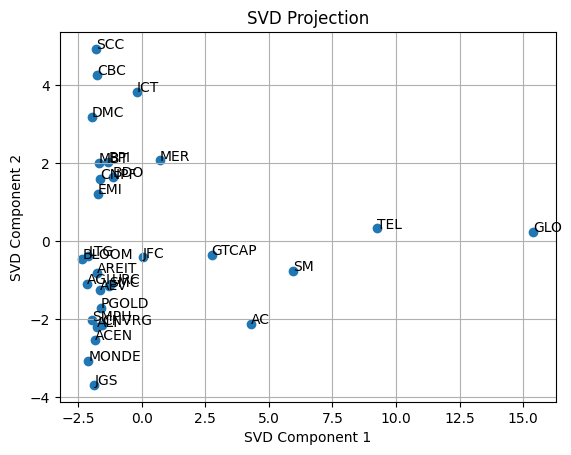

In [67]:
plt.scatter(final_revised[:, 0], final_revised[:, 1])
for i, label in enumerate(pre_dr_df.index):
    plt.annotate(label, (final_revised[i, 0], final_revised[i, 1]))
plt.xlabel("SVD Component 1")
plt.ylabel("SVD Component 2")
plt.title("SVD Projection")
plt.grid(True)
plt.show()

✅ Clusters / Groupings

    Companies that appear close to each other (e.g., MBT, BPI, MER, DMC, etc.) share similar patterns in the original high-dimensional space — possibly similar sentiment, financial indicators, or business fundamentals.

    GLO and TEL are far from the rest, indicating strongly distinct features or outlier behavior.

🔀 Separation Along Components

    SVD Component 1 (x-axis): Seems to separate GLO, TEL, AC, SM from the rest. This component might capture some dominant theme (e.g., company size, tech sector signal, or growth potential).

    SVD Component 2 (y-axis): Captures a secondary contrast — SCC, CBC, DMC are high, JGS, MONDE are low. This could be a sentiment polarity or operational scale factor.

🧭 Outliers

    GLO (far right) and TEL are outliers on Component 1 — they differ significantly from the rest, perhaps due to unique features (e.g., high positive sentiment or a dominant market position).

    SCC, CBC stand out at the top — potentially distinct due to operational or industry-specific traits.

In [68]:
original_index  = pre_dr_df.index.to_list()

In [88]:
# Create DataFrame
final_revised_df = pd.DataFrame(final_revised, columns=[f"Component_{i+1}" for i in range(X_reduced.shape[1])])
final_revised_df["Ticker"] = original_index  # Optional, for easy trackingV
final_revised_df.set_index("Ticker", inplace=True)
final_revised_df.index.name = None

In [89]:
display(final_revised_df)


,Component_1,Component_2,Component_3,Component_4,Component_5,Component_6
AC,4.287662,-2.108739,-0.221879,1.111325,-0.621032,0.533542
ACEN,-1.855112,-2.535913,1.287321,-0.038274,-0.636664,-3.123497
AEV,-1.645642,-1.238430,-0.160024,1.473214,0.964508,0.081256
AGI,-2.140327,-1.100343,-1.164526,0.708336,0.484388,1.077433
ALI,-1.757066,-2.200786,0.761110,1.613442,0.074689,0.087785
AREIT,-1.749807,-0.812237,-1.205456,1.695526,-0.926050,-0.292775
BDO,-1.151354,1.634453,-0.295690,-0.565894,-0.212572,0.399700
BLOOM,-2.343387,-0.463259,-0.638220,-3.712748,0.542139,0.669556
BPI,-1.309872,2.024676,-0.876580,-0.788839,-0.437510,-0.406455
CBC,-1.770381,4.244353,-1.478481,-0.260620,-1.096534,-0.304564


In [90]:
final_revised_df.to_csv('data/Final_Revised_Dataset.csv')